# **Análisis exploratorio y estadística**

# AE11 - CAPSTONE - Reconstrucción análisis 538 - Fandango

## <font color='blue'>**Contexto**</font>

__[FiveThirtyEight](https://fivethirtyeight.com/)__, a veces representado como __538__, es un sitio web estadounidense que se centra en el análisis de encuestas de opinión, la política, la economía y los blogs deportivos.

En octubre de 2015, publico un análisis que tituló "Be Suspicious Of Online Movie Ratings, Especially Fandango’s" (Sospeche de las clasificaciones de películas en línea, especialmente de Fandango), en el cual analizaba y cuestionaba el hecho que __la misma empresa__ (Fandango) tenía un __conflicto de interés__ al __publicar las calificaciones__ de las películas y __vender entradas__ al mismo tiempo.

<img src="https://drive.google.com/uc?export=view&id=1ErZN_tzjnzNRHjsPN-Ha2zpB_1_IU_6I" width='900'>


## <font color='blue'>**Preguntas de investigación**</font>
1. ¿Tienen Fandango alguna predisposición a calificar las películas por encima de lo que deberían calificar?
2. ¿Hay evidencias de conflicto de interés en un sitio web que nos entrega las calificaciones de las películas y que, además, nos vende entradas?


## <font color='blue'>**Misión**</font>
Su objetivo es completar las actividades a continuación basándose en el artículo __538__ mencionado, y ver si llega a una conclusión similar. Utilice los conocimientos adquiridos (`Pandas`, `Numpy`,`Malplotlib`, visualización y estadísticas) para determinar si las calificaciones de Fandango en 2015 tenían un sesgo hacia calificar mejor las películas para vender más boletos.



## <font color='blue'>__Ejercicios__</font>

### <font color='green'>**Actividad 1**</font>
### Investigación de los antecedentes y los datos


1. Lea el artículo: [Sospeche de las calificaciones de películas en línea, especialmente las de Fandango](http://fivethirtyeight.com/features/fandango-movies-ratings/)
2. Lea los datasets del estudio. Hay dos archivos csv, uno con las calificaciones de Fandango (`fandango_scrape.csv`), y el otro con datos agregados para clasificaciones de películas de otros sitios, como Metacritic, IMDB y Rotten Tomatoes (`all_sites_scores.csv`). Los datos de Fandango se extrajeron el 24 de agosto de 2015, y contienen al menos 3 valoraciones de usuarios por película.
3. Explore las características de ambos datasets.

__Descripción de all_sites_scores.csv__

Columna | Contenido
--- | -----------
FILM | La película analizada
RottenTomatoes | Rotten Tomatoes Tomatometer valoración para la película
RottenTomatoes_User | Rotten Tomatoes valoración de usuario para la película
Metacritic | Metacritic valoración para la película
Metacritic_User | Metacritic valoración de usuario para la película
IMDB | IMDb valoración de usuario para la película
Metacritic_user_vote_count | Número de votos de usuario que tuvo la película en Metacritic
IMDB_user_vote_count | Número de votos de usuario que tuvo la película en IMDb


__Descripción de fandango_scrape.csv__

Contiene todas las películas analizadas por el sitio __538__.

Columna | Contenido
--- | ---------
FILM | La película analizada
STARS | Valoración en estrellas presentada en Fandango.com
RATING |El valor de calificación de Fandango para la película, extraído del HTML de cada página. Esta es la puntuación media real que obtuvo la película.
VOTES | Cantidad de personas que habían revisado la película en el momento en que la sacamos.

In [1]:
# Tu código aquí ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.__version__

'2.1.1'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [4]:
# Leemos los archivos
fandango = pd.read_csv("E:\\2023\Corfo\M03 - ANÁLISIS EXPLORATORIO Y ESTADÍSTICA\data\\fandango_scrape.csv")
all_sites = pd.read_csv("E:\\2023\Corfo\M03 - ANÁLISIS EXPLORATORIO Y ESTADÍSTICA\data\\all_sites_scores.csv")

In [5]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [6]:
fandango.describe(include = 'all')

,FILM,STARS,RATING,VOTES
count,504,504.000000,504.000000,504.000000
unique,503,NaN,NaN,NaN
top,Nannbenda (2015),NaN,NaN,NaN
freq,2,NaN,NaN,NaN
mean,NaN,3.558532,3.375794,1147.863095
std,NaN,1.563133,1.491223,3830.583136
min,NaN,0.000000,0.000000,0.000000
25%,NaN,3.500000,3.100000,3.000000
50%,NaN,4.000000,3.800000,18.500000
75%,NaN,4.500000,4.300000,189.750000


In [7]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [8]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [9]:
all_sites.describe(include = 'all')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
unique,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Avengers: Age of Ultron (2015),NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,NaN,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,NaN,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,NaN,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,NaN,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,NaN,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000


In [10]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


<font color='green'>Fin actividad 1</font>

### <font color='green'>**Actividad 2**</font>

### Explorando las valoraciones mostradas en Fandango frente a las puntuaciones reales de los usuarios

Exploremos las calificaciones de Fandango para ver si nuestro análisis está de acuerdo con la conclusión del artículo.

1. Explore la relación entre la popularidad de una película y su calificación. Cree un diagrama de dispersión que muestre la relación entre la calificación y los votos.
2. Calcule la correlación entre las distintas variables y visualícelas.
3. Calcule cuántas películas hay en Fandango por año y visualice.
4. Cuáles son las 10 películas con más votaciones?
5. Cuántas películas tienen cero votos?
6. Cree un nuevo DataFrame con las películas que tienen al menos un voto



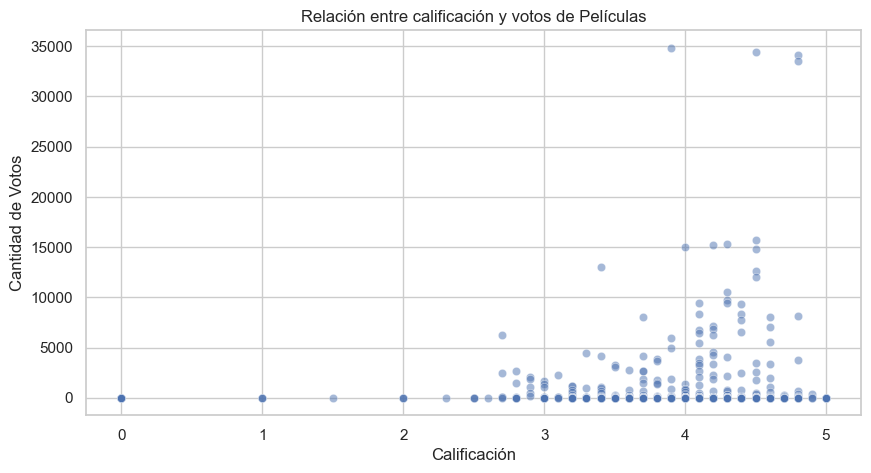

In [11]:
# Tu código aquí ...
# 1. Relación entre la popularidad de una película y su calificación
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Creación del diagrama de dispersión
plt.figure(figsize=(10, 5))
sns.scatterplot(x='RATING', y='VOTES', data=fandango, alpha=0.5)
plt.title('Relación entre calificación y votos de Películas')
plt.xlabel('Calificación')
plt.ylabel('Cantidad de Votos')
plt.show()

In [12]:
# 2. Correlación entre las distintas variables
correlation_matrix = fandango[['STARS', 'RATING', 'VOTES']].corr()
correlation_matrix

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


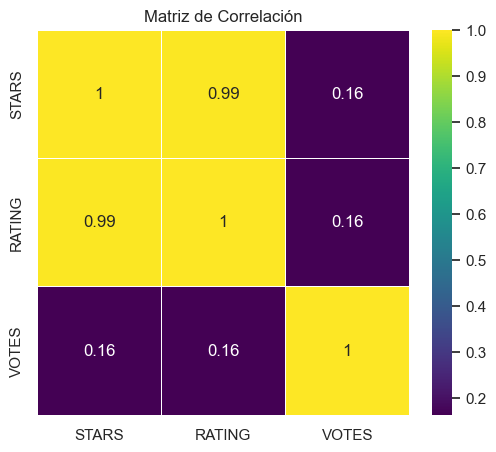

In [13]:
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [14]:
# 3. Calcule cuántas películas hay en Fandango por año y visualice.
# Crear un DataFrame con el año extraído de la columna "FILM"
fandango['YEAR'] = fandango['FILM'].str.extract(r'\((\d{4})\)')[0]

# Contar el número de películas por año
movies_per_year = fandango['YEAR'].value_counts().sort_index()
movies_per_year

YEAR
1964      1
2012      1
2014     24
2015    477
2016      1
Name: count, dtype: int64

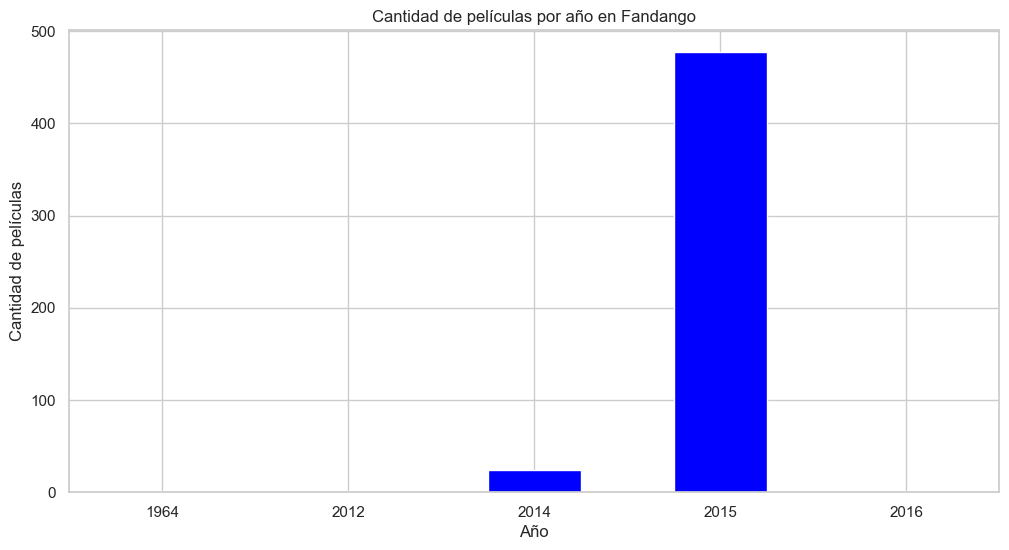

In [15]:
# Visualizar el número de películas por año
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar', color='blue')
plt.title('Cantidad de películas por año en Fandango')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=0)
plt.show()

In [16]:
# 4. Las 10 películas con más votos
top_10_movies_by_votes = fandango.sort_values(by='VOTES', ascending=False).head(10)
top_10_movies_by_votes

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


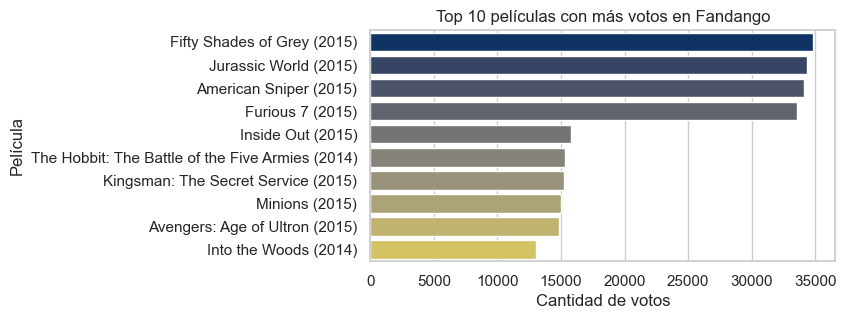

In [18]:
# Crear el gráfico de barras horizontales con Seaborn
plt.figure(figsize=(6, 3))
ax = sns.barplot(x='VOTES', y='FILM', data=top_10_movies_by_votes, palette='cividis', hue = 'FILM')
ax.set_xlabel('Cantidad de votos')
ax.set_ylabel('Película')
ax.set_title('Top 10 películas con más votos en Fandango')
plt.show()

In [19]:
# 5. Cuántas películas tienen cero votos
peliculas_con_cero_votos = fandango[fandango['VOTES'] == 0].shape[0]
peliculas_con_cero_votos

69

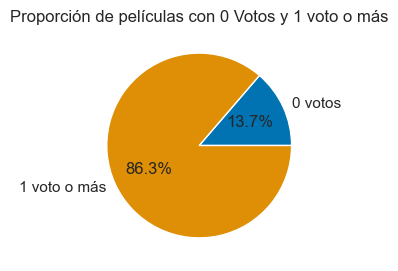

In [20]:
peliculas_con_un_voto_o_mas = fandango[fandango['VOTES'] >= 1].shape[0]

# Crear un gráfico de torta con Seaborn
labels = ['0 votos', '1 voto o más']
sizes = [peliculas_con_cero_votos, peliculas_con_un_voto_o_mas]

plt.figure(figsize=(5, 3))
sns.set_palette("colorblind")
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proporción de películas con 0 Votos y 1 voto o más')
plt.show()

In [21]:
# 6. Creamos una nuevo DataFrame con las películas con al menos una valoración
peliculas_con_valoracion = fandango[fandango['VOTES'] >= 1].copy()
len(peliculas_con_valoracion)
len(fandango)
peliculas_con_valoracion

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


<font color='green'>Fin actividad 2</font>

### <font color='green'>**Actividad 3**</font>

En un sistema de redondeo normal, un sitio redondearía a la media estrella de valoración más cercana, hacia arriba o hacia abajo. Como se indica en el artículo, el sistema de redondeo de Fandango, y a modo de ejemplo, en el caso de "Ted 2", esperaríamos que la calificación se redondeara a 4 estrellas (dado que la valoración es de usuarios es 4.1). Sin embargo, Fandango redondeó el "ratingValue" hacia arriba, hasta un 4.5. Esto nos demuestra que la calificación real del usuario puede ser ligeramente diferente a la calificación que se le muestra a un usuario en el sitio web.
Visualice esta diferencia en distribuciones.

1. Verifique con gráficos KDE rellenos si las distribuciones de las calificaciones que se muestran (STARS) son distintas a la calificación real de los votos (RATING). Tip: recorte los KDE a 0-5 con
`clip=[0,5]`

2. Si es que en el punto anterior hay una diferencia, cuantifíquela y añádala en una nueva columna del DataFrame. Esta nueva columna debe quedar expresada con un decimal.

3. Grafique la cantidad de veces que cada diferencia (0.1, 0.2, 0.3, etc.) se produce.

4. ¿Qué película(s) tiene(n) un diferencial de más de media estrella?

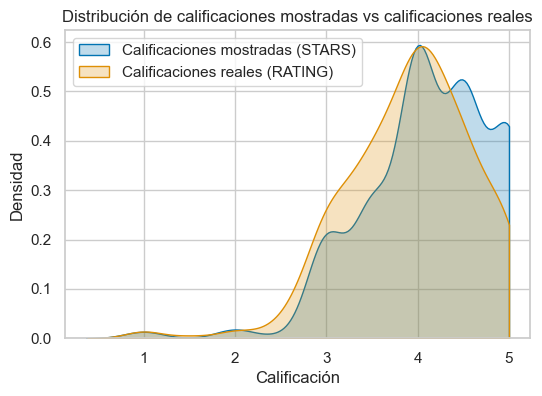

In [22]:
# Tu código aquí ...
# 1. Comparamos los KDEs
# Recortar las calificaciones en el rango de 0 a 5
#

# Crear gráficos KDE rellenos para las calificaciones mostradas y las calificaciones reales
plt.figure(figsize=(6, 4))
sns.kdeplot(data=peliculas_con_valoracion['STARS'], fill=True, label='Calificaciones mostradas (STARS)', clip=(0, 5))
sns.kdeplot(data=peliculas_con_valoracion['RATING'], fill=True, label='Calificaciones reales (RATING)', clip=(0, 5))
plt.xlabel('Calificación')
plt.ylabel('Densidad')
plt.title('Distribución de calificaciones mostradas vs calificaciones reales')
plt.legend(loc='upper left')
plt.show()

In [23]:
# 2. Cuantifiquemos ahora realmente esta discrepancia.
# Calcular la diferencia entre las calificaciones mostradas y las calificaciones reales
peliculas_con_valoracion['DIFFERENCE'] = peliculas_con_valoracion['STARS'] - peliculas_con_valoracion['RATING']

# Redondear la diferencia a un decimal
peliculas_con_valoracion['DIFFERENCE'] = peliculas_con_valoracion['DIFFERENCE'].round(1)
peliculas_con_valoracion.head()

,FILM,STARS,RATING,VOTES,YEAR,DIFFERENCE
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


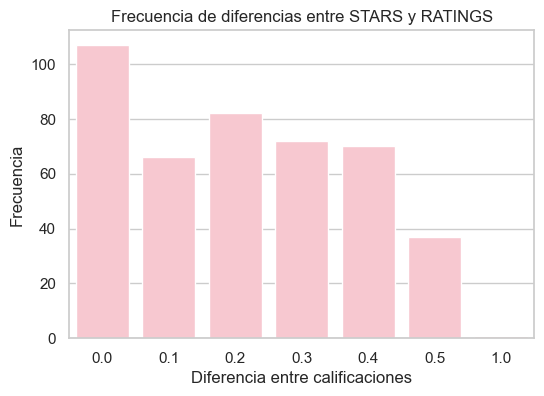

In [24]:
# 3. Cantidad de veces que las diferencias se producen.
# Calcular la frecuencia de cada diferencia
diferencia_frecuencia = peliculas_con_valoracion['DIFFERENCE'].value_counts().sort_index()

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x=diferencia_frecuencia.index, y=diferencia_frecuencia.values, color='pink')
plt.xlabel('Diferencia entre calificaciones')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de diferencias entre STARS y RATINGS')
plt.xticks(rotation=0)
plt.show()

In [25]:
diferencia_frecuencia

DIFFERENCE
0.0    107
0.1     66
0.2     82
0.3     72
0.4     70
0.5     37
1.0      1
Name: count, dtype: int64

In [26]:
# 4. Buscamos la pelicula con una diferencia de una estrella
# Buscar la película con una diferencia de una estrella
pelicula_diferencia_una_estrella = peliculas_con_valoracion[peliculas_con_valoracion['DIFFERENCE'] == 1.0]

# Mostrar la película con una diferencia de una estrella
print("Película con una diferencia de una estrella:")

pelicula_diferencia_una_estrella

Película con una diferencia de una estrella:


,FILM,STARS,RATING,VOTES,YEAR,DIFFERENCE
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


<font color='green'>Fin actividad 3</font>

### <font color='green'>**Actividad 4**</font>
## Comparación de las valoraciones de Fandango con Rotten Tomatoes

Compare las valoraciones de Fandango con la de __Rotten Tomatoes__. Analice y comente las diferencias.

1. Analice __Rotten Tomatoes__ (__RT__). Observe cómo el sitio tiene dos valoraciones; una de críticos especializados y otra de usuarios. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. Cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para Rotten Tomatoes. Calcule esto con `RottenTomatoes - RottenTomatoes_User`

3. Calcule la diferencia media absoluta obtenida en el punto 2. Atención con los valores negativos.

4. Visualice con 2 subplots horizontales:
  * La distribución de las diferencias entre `RT Critics Score` y `RT User Score`. Debe haber valores negativos en esta gráfica de distribución. Utilice KDE e histogramas para mostrar esta distribución.
  * La distribución que muestre la diferencia en valor absoluto.
  * Incluya un título a cada subplot y un título general a nivel del lienzo (figure).

5. ¿Cuáles son las 10 películas más valoradas por los usuarios en promedio que los críticos? Y ¿Cuáles son las 10 películas con mejores valoraciones de críticos de películas que de usuarios?

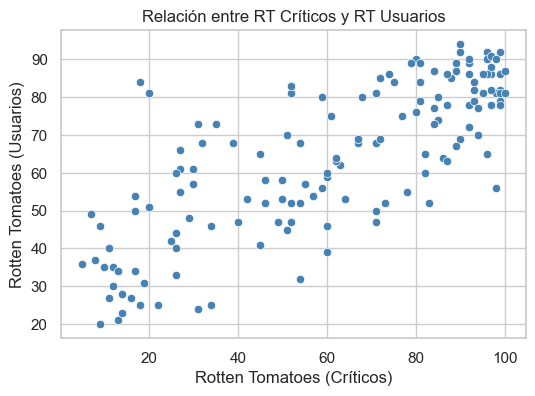

In [27]:
# Tu código aquí ...

# 1. Dispersión de RT
# Crear un gráfico de dispersión para Rotten Tomatoes (RT) - críticos vs usuarios
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RottenTomatoes', y='RottenTomatoes_User', data=all_sites, color='steelblue')
plt.xlabel('Rotten Tomatoes (Críticos)')
plt.ylabel('Rotten Tomatoes (Usuarios)')
plt.title('Relación entre RT Críticos y RT Usuarios')
plt.show()

In [28]:
# 2. Rotten_Diff =  Critics - User Score.
# Calcular la diferencia entre las calificaciones de críticos y las calificaciones de usuarios para Rotten Tomatoes
all_sites['RT_Difference'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites.head()


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [29]:
# 3. Diferencia media absoluta
# Calcular la diferencia media absoluta (Mean Absolute Difference - MAD)
mad_rt_difference = all_sites['RT_Difference'].abs().mean().round(1)
mad_rt_difference

15.1

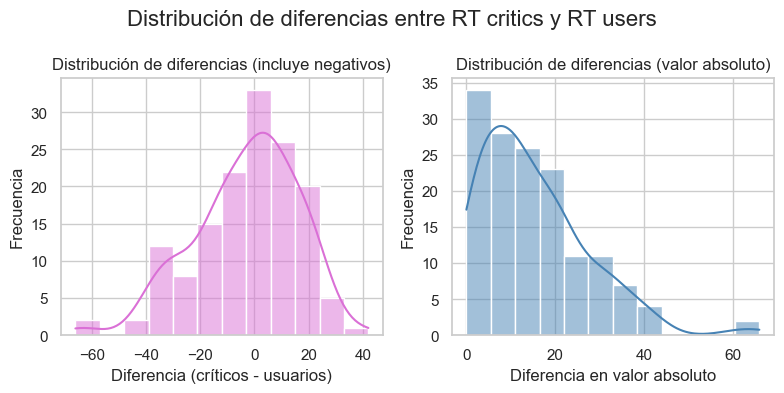

In [30]:
# 4. Visualización de la distribución de las diferencias y del valor absoluto de las diferencias
# Crear una figura con dos subplots horizontales
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Subplot 1: Distribución de las diferencias con valores negativos.
sns.histplot(all_sites['RT_Difference'], kde=True, ax=axs[0], color='orchid')
axs[0].set_xlabel('Diferencia (críticos - usuarios)')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Distribución de diferencias (incluye negativos)')

# Subplot 2: Distribución de las diferencias en valor absoluto.
sns.histplot(all_sites['RT_Difference'].abs(), kde=True, ax=axs[1], color='steelblue')
axs[1].set_xlabel('Diferencia en valor absoluto')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Distribución de diferencias (valor absoluto)')

# Título general a nivel del lienzo.
fig.suptitle('Distribución de diferencias entre RT critics y RT users', fontsize=16)

# Ajuste de los elementos para una mejor visualización.
plt.tight_layout()
plt.show()

In [31]:
# 5. Las 10 películas más valoradas por los usuarios en promedio que los críticos
# Calcular la diferencia en valor absoluto entre calificaciones de críticos y usuarios para Rotten Tomatoes
all_sites['RT_Difference2'] = all_sites['RottenTomatoes_User'] - all_sites['RottenTomatoes']

# Ordenar las películas por la diferencia en valor absoluto en orden descendente y seleccionar las 10 primeras
top_10_movies_users_vs_critics_rt = all_sites.nlargest(10, 'RT_Difference2')[['FILM', 'RT_Difference2', 'RottenTomatoes_User', 'RottenTomatoes']]

# Mostrar las 10 películas más valoradas por los usuarios en promedio que los críticos para Rotten Tomatoes
print("Las 10 películas más valoradas por los usuarios en promedio que los críticos para Rotten Tomatoes:")
top_10_movies_users_vs_critics_rt


Las 10 películas más valoradas por los usuarios en promedio que los críticos para Rotten Tomatoes:


,FILM,RT_Difference2,RottenTomatoes_User,RottenTomatoes
3,Do You Believe? (2015),66,84,18
85,Little Boy (2015),61,81,20
105,Hitman: Agent 47 (2015),42,49,7
134,The Longest Ride (2015),42,73,31
125,The Wedding Ringer (2015),39,66,27
132,Max (2015),38,73,35
15,Taken 3 (2015),37,46,9
19,Pixels (2015),37,54,17
51,Entourage (2015),36,68,32
47,Annie (2014),34,61,27


In [32]:
# Las 10 películas con mejores valoraciones de críticos de películas que de usuarios
# Ordenar las películas por la diferencia en valoración (críticos - usuarios) en orden descendente y seleccionar las 10 primeras
all_sites['RT_Abs_Difference1'] = (all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User'])
top_10_movies_critics_over_users_rt = all_sites.nlargest(10, 'RT_Abs_Difference1')[['FILM', 'RT_Abs_Difference1', 'RottenTomatoes', 'RottenTomatoes_User']]

# Mostrar las 10 películas con mejores valoraciones de críticos que de usuarios para Rotten Tomatoes
print("Las 10 películas con mejores valoraciones de críticos que de usuarios para Rotten Tomatoes:")
top_10_movies_critics_over_users_rt


Las 10 películas con mejores valoraciones de críticos que de usuarios para Rotten Tomatoes:


,FILM,RT_Abs_Difference1,RottenTomatoes,RottenTomatoes_User
69,Mr. Turner (2014),42,98,56
112,It Follows (2015),31,96,65
115,While We're Young (2015),31,83,52
37,Welcome to Me (2015),24,71,47
40,I'll See You In My Dreams (2015),24,94,70
145,"Kumiko, The Treasure Hunter (2015)",24,87,63
90,The SpongeBob Movie: Sponge Out of Water (2015),23,78,55
7,Top Five (2014),22,86,64
11,Black Sea (2015),22,82,60
87,Maggie (2015),22,54,32


<font color='green'>Fin actividad 4</font>

### <font color='green'>**Actividad 5**</font>
## Comparación de las valoraciones de Fandango con MetaCritic

Ahora echemos un vistazo a las calificaciones de __MetaCritic__. Metacritic también muestra una calificación de usuario promedio en comparación con su calificación oficial mostrada.

1. Realice una visualización de dispersión de ambas variables.

2. Determine la diferencia comparando las calificaciones de los críticos y las calificaciones de los usuarios de __RT__. De forma similar a la __Actividad 4__ cree una nueva columna basada en la diferencia entre las calificaciones de los críticos y las calificaciones de los usuarios para MetaCritic. Calcule esto con `Metacritic - Metacritic_User`

3. Visualice las comparación de diferencias de __RT__ con las de __MetaCritic__.

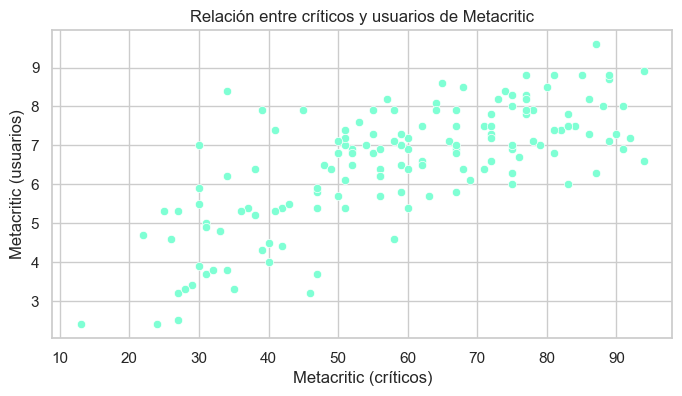

In [33]:
# Tu código aquí ...
# 1. Visualización de dispersión de crítica oficial versus de usuarios
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Metacritic', y='Metacritic_User', data=all_sites, color='aquamarine')
plt.xlabel('Metacritic (críticos)')
plt.ylabel('Metacritic (usuarios)')
plt.title('Relación entre críticos y usuarios de Metacritic')
plt.show()

In [34]:
all_sites['Metacritic_Norm2'] = all_sites['Metacritic']/10
all_sites[['FILM', 'Metacritic', 'Metacritic_Norm2', 'Metacritic_User']].head()

,FILM,Metacritic,Metacritic_Norm2,Metacritic_User
0,Avengers: Age of Ultron (2015),66,6.6,7.1
1,Cinderella (2015),67,6.7,7.5
2,Ant-Man (2015),64,6.4,8.1
3,Do You Believe? (2015),22,2.2,4.7
4,Hot Tub Time Machine 2 (2015),29,2.9,3.4


In [35]:
# Definir los límites del nuevo rango para la normalización
metacritic_min, metacritic_max = all_sites['Metacritic'].min(), all_sites['Metacritic'].max()
metacritic_user_min, metacritic_user_max = all_sites['Metacritic_User'].min(), all_sites['Metacritic_User'].max()


# Normalizar 'Metacritic_User' al rango (0 a 10)
all_sites['Metacritic_User_Normalized'] = ((all_sites['Metacritic_User'] - metacritic_user_min) / (metacritic_user_max - metacritic_user_min)) * 100

# Mostrar el DataFrame con las columnas normalizadas
all_sites[['FILM', 'Metacritic_User', 'Metacritic_User_Normalized']]

,FILM,Metacritic_User,Metacritic_User_Normalized
0,Avengers: Age of Ultron (2015),7.1,65.277778
1,Cinderella (2015),7.5,70.833333
2,Ant-Man (2015),8.1,79.166667
3,Do You Believe? (2015),4.7,31.944444
4,Hot Tub Time Machine 2 (2015),3.4,13.888889
...,...,...,...
141,Mr. Holmes (2015),7.9,76.388889
142,'71 (2015),7.5,70.833333
143,"Two Days, One Night (2014)",8.8,88.888889
144,Gett: The Trial of Viviane Amsalem (2015),7.3,68.055556


C:\Users\CAT\AppData\Local\Temp\ipykernel_7036\1592161916.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


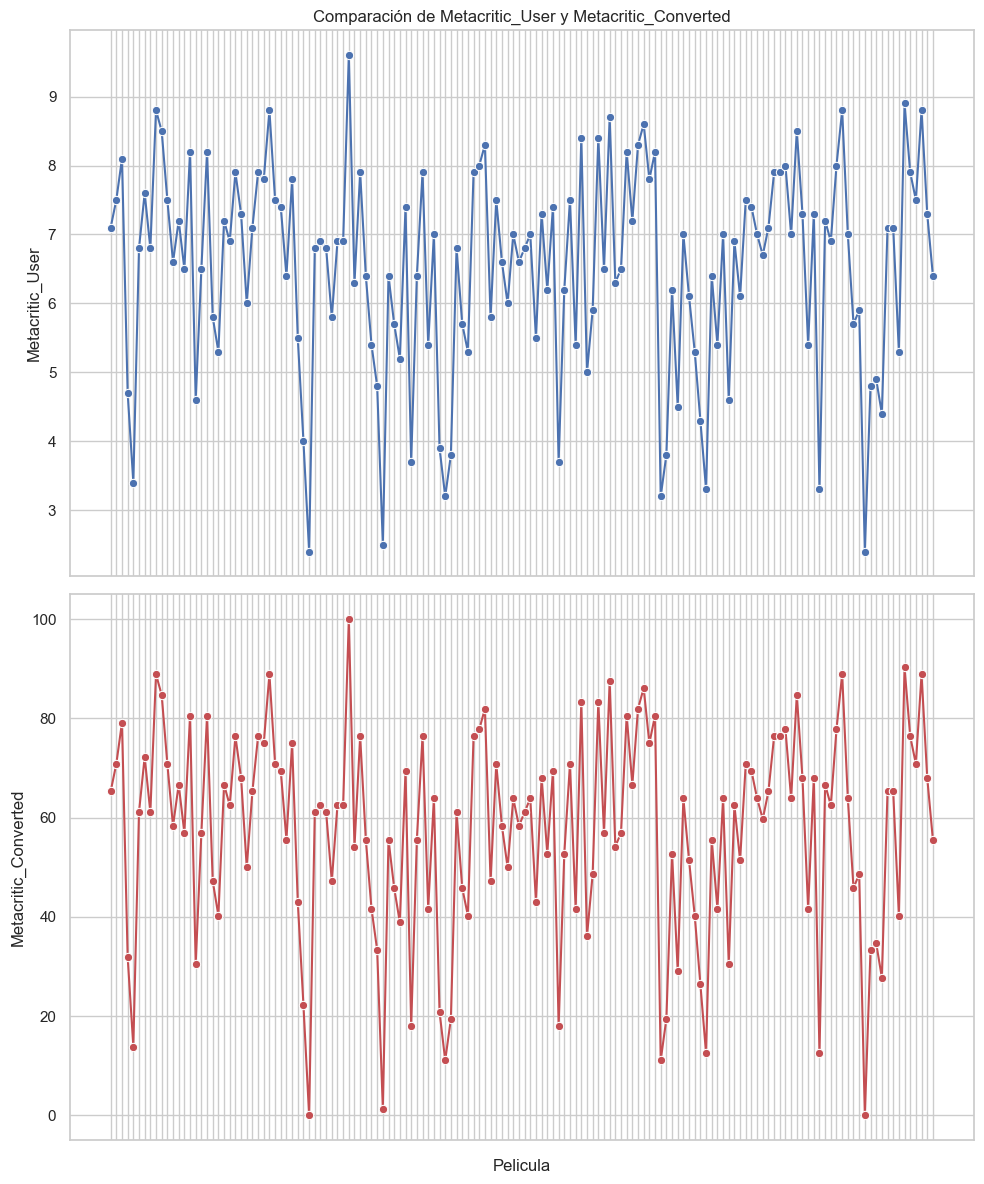

In [36]:
# Crear subgráficos
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Gráfico para Metacritic_User
sns.lineplot(data=all_sites, x='FILM', y='Metacritic_User', ax=axs[0], marker='o', color='b')
axs[0].set_ylabel('Metacritic_User')
axs[0].set_title('Comparación de Metacritic_User y Metacritic_Converted')
axs[0].grid(True)

# Gráfico para Metacritic_Converted
sns.lineplot(data=all_sites, x='FILM', y='Metacritic_User_Normalized', ax=axs[1], marker='o', color='r')
axs[1].set_xlabel('Pelicula')
axs[1].set_ylabel('Metacritic_Converted')
axs[1].grid(True)

# Rotar etiquetas del eje x para mayor legibilidad
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [39]:
# 2. Metacritic_Diff =  Criticos - Usuarios
# Calcular la diferencia entre las calificaciones de críticos y las calificaciones de usuarios para Metacritic
all_sites['Metacritic_Diff'] = (all_sites['Metacritic'] - all_sites['Metacritic_User_Normalized']).abs()

# Verificar el DataFrame con la nueva columna
all_sites[['FILM', 'Metacritic', 'Metacritic_User_Normalized', 'Metacritic_Diff']].head()


,FILM,Metacritic,Metacritic_User_Normalized,Metacritic_Diff
0,Avengers: Age of Ultron (2015),66,65.277778,0.722222
1,Cinderella (2015),67,70.833333,3.833333
2,Ant-Man (2015),64,79.166667,15.166667
3,Do You Believe? (2015),22,31.944444,9.944444
4,Hot Tub Time Machine 2 (2015),29,13.888889,15.111111


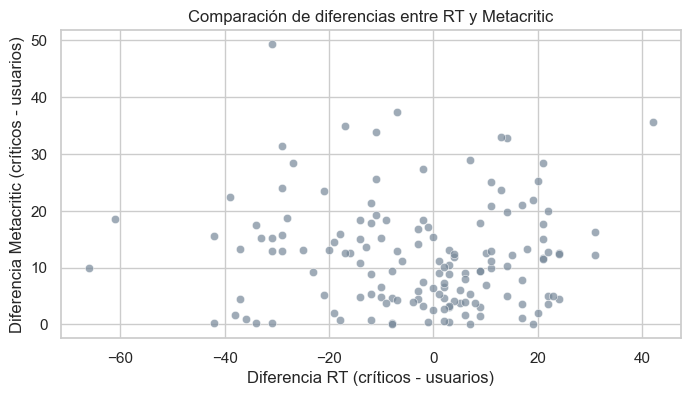

In [42]:
# 3. Dispersión de diferencias
# Crear un gráfico de dispersión con Seaborn para comparar las diferencias entre RT y Metacritic
plt.figure(figsize=(8, 4))
sns.scatterplot(x='RT_Abs_Difference1', y='Metacritic_Diff', data=all_sites, color='lightslategrey', alpha=0.7)
plt.xlabel('Diferencia RT (críticos - usuarios)')
plt.ylabel('Diferencia Metacritic (críticos - usuarios)')
plt.title('Comparación de diferencias entre RT y Metacritic')
plt.show()

<font color='green'>Fin actividad 5</font>

### <font color='green'>**Actividad 6**</font>
## Comparación de valoraciones de Fandago vs. All Sites

Explore si Fandango muestra artificialmente calificaciones más altas que las justificadas para impulsar la venta de boletos.

1. Combine ambos datasets (`Fandango` con `All_Sites`). ¿Cuántos registros se pierden en la fusión?
2. Normalice las columnas para que sus escalas sean comparables. Fandango utiliza una escala de $0-5$ para `STARS` y `RATINGS`.
3. Simplifique el DataFrame. Genere una copia con las valoraciones normalizadas. Incluya `STARS`y `RATING` desde Fandango.
4. Compare de la distribución de puntuaciones entre sitios. ¿Fandango muestra calificaciones anormalmente altas? Ya sabemos que su `RATIBG` mostrado es más alto que las valoraciones de usuarios (`STARS`), pero ¿son las calificaciones en sí mismas más altas que el promedio? Analice y comente.
5. Cree una gráfica `hisplot` comparando todas las puntuaciones normalizadas.
6. ¿Cómo se califican las peores películas en todos los sitios? Cree una visualización del tipo `clustermap` de todas las puntuaciones normalizadas. Investigue acerca de esta gráfica avanzada de `Seaborn`.
7. Según las calificaciones de los críticos de __RT__, ¿cuáles son las 10 películas con las calificaciones más bajas? ¿Cuáles son las puntuaciones normalizadas en los otros sitios para estas películas?

In [43]:
# Tu código aquí ...
# 1. Merge de ambos datasets
# No todas las películas de la tabla Fandango están en la tabla All_Sites
# algunas películas de Fandango tienen muy pocas críticas o ninguna.
# Solo queremos comparar películas que están en ambos DataFrames,
# Fusionar los DataFrames usando la columna 'FILM'
merged_df = pd.merge(fandango, all_sites, on='FILM', how='inner')

# Calcular cuántos registros se pierden en la fusión
registros_perdidos = (len(fandango) + len(all_sites)) - len(merged_df)

# Mostrar la cantidad de registros perdidos en la fusión
print("Registros perdidos en la fusión:", registros_perdidos)
len(merged_df)

Registros perdidos en la fusión: 505


145

In [44]:
len(all_sites)

146

In [45]:
# Crear un diccionario con la información
data = {
    'DataFrame': ['fandango', 'all_sites', 'merged_df', 'reg_perdidos'],
    'Registros': [len(fandango), len(all_sites), len(merged_df), (len(fandango) - len(merged_df))]
}

# Crear un DataFrame a partir del diccionario
registros_df = pd.DataFrame(data)

# Mostrar el DataFrame
registros_df



,DataFrame,Registros
0,fandango,504
1,all_sites,146
2,merged_df,145
3,reg_perdidos,359


Tenga en cuenta que RT, Metacritic e IMDB no usan una puntuación entre 0-5 estrellas como lo hace Fandango. Para hacer una comparación justa, necesitamos * normalizar * estos valores para que todos caigan entre 0 y 5 estrellas y la relación entre las reseñas se mantenga igual.


Tips:
1. https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

2. Otra forma simple de normalizar es dividiendo las escalas para asemejarlas a la de Fandango.
  * 100/20 = 5
  * 10/2 = 5

In [46]:
merged_df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Difference,RT_Difference2,RT_Abs_Difference1,Metacritic_Norm2,Metacritic_User_Normalized,Metacritic_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17,-17,4.6,11.111111,34.888889
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10,-10,5.9,63.888889,4.888889
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13,-13,7.2,58.333333,13.666667
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3,-3,6.7,61.111111,5.888889
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,-8,8,9.4,90.277778,3.722222


In [47]:
# 2. Normalización de las valoraciones
# Normalizar las columnas a una escala de 0 a 5
# Normalizar las columnas de Rotten Tomatoes y Metacritic a una escala de 0 a 5
merged_df['RottenTomatoes_Normalized'] = merged_df['RottenTomatoes'] * 0.05
merged_df['RottenTomatoes_User_Normalized'] = merged_df['RottenTomatoes_User'] * 0.05
merged_df['Metacritic_Normalized'] = merged_df['Metacritic'] * 0.05
merged_df['Metacritic_User_Normalized1'] = merged_df['Metacritic_User'] * 0.5
merged_df['IMDB_Normalized'] = merged_df['IMDB'] * 0.5

merged_df.head()



,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,...,RT_Difference2,RT_Abs_Difference1,Metacritic_Norm2,Metacritic_User_Normalized,Metacritic_Diff,RottenTomatoes_Normalized,RottenTomatoes_User_Normalized,Metacritic_Normalized,Metacritic_User_Normalized1,IMDB_Normalized
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,...,17,-17,4.6,11.111111,34.888889,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,...,10,-10,5.9,63.888889,4.888889,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,...,13,-13,7.2,58.333333,13.666667,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,...,3,-3,6.7,61.111111,5.888889,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,...,-8,8,9.4,90.277778,3.722222,4.90,4.50,4.70,4.45,4.30


In [48]:
# 3. Simplificación del DataFrame
# Seleccionar las columnas relevantes y crear una copia
simplified_df = merged_df[['FILM', 'STARS', 'RATING', 'RottenTomatoes_Normalized', 'RottenTomatoes_User_Normalized', 'Metacritic_Normalized', 'Metacritic_User_Normalized1', 'IMDB_Normalized']].copy()

# Verificar el DataFrame simplificado
simplified_df.head()

,FILM,STARS,RATING,RottenTomatoes_Normalized,RottenTomatoes_User_Normalized,Metacritic_Normalized,Metacritic_User_Normalized1,IMDB_Normalized
0,Fifty Shades of Grey (2015),4.0,3.9,1.25,2.10,2.30,1.60,2.10
1,Jurassic World (2015),4.5,4.5,3.55,4.05,2.95,3.50,3.65
2,American Sniper (2015),5.0,4.8,3.60,4.25,3.60,3.30,3.70
3,Furious 7 (2015),5.0,4.8,4.05,4.20,3.35,3.40,3.70
4,Inside Out (2015),4.5,4.5,4.90,4.50,4.70,4.45,4.30


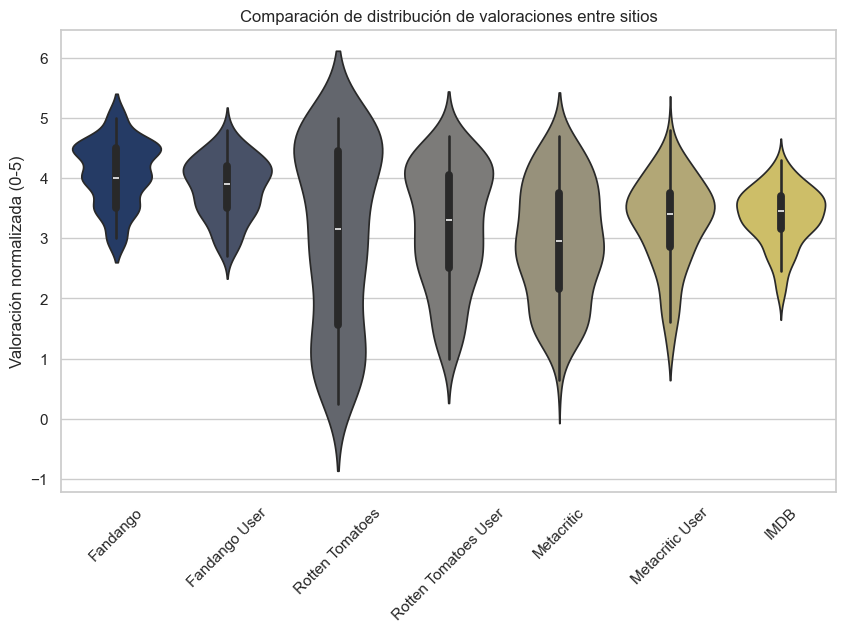

In [49]:
# 4. Comparando distribuciones de valoraciones

# Seleccionar las columnas relevantes para la comparación
scores = merged_df[['STARS', 'RATING', 'RottenTomatoes_Normalized', 'RottenTomatoes_User_Normalized', 'Metacritic_Normalized', 'Metacritic_User_Normalized1', 'IMDB_Normalized']]

# Renombrar las columnas para una mejor visualización
scores.columns = ['Fandango', 'Fandango User', 'Rotten Tomatoes', 'Rotten Tomatoes User', 'Metacritic', 'Metacritic User', 'IMDB']

# Crear un gráfico de violín para comparar las distribuciones de puntuaciones
plt.figure(figsize=(10, 6))
sns.violinplot(data=scores, palette='cividis')
plt.title('Comparación de distribución de valoraciones entre sitios')
plt.ylabel('Valoración normalizada (0-5)')
plt.xticks(rotation=45)
plt.show()


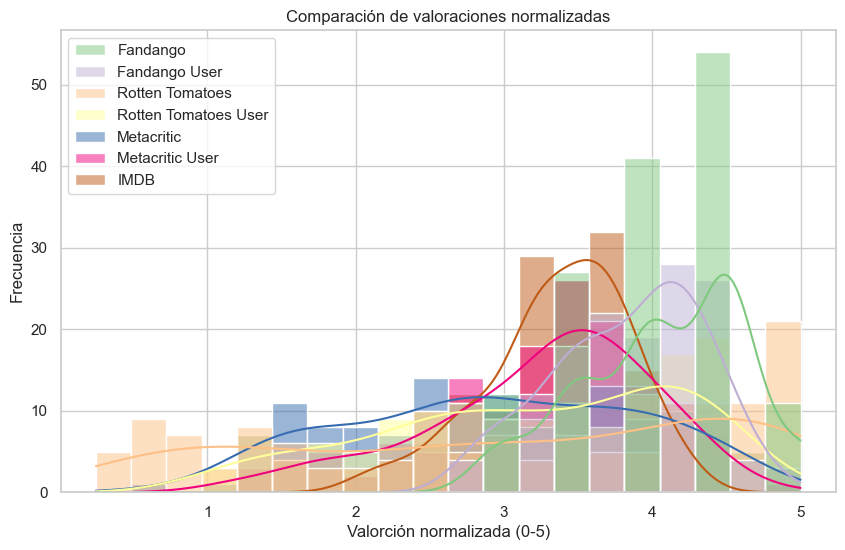

In [51]:
# 5. Hisplot comparando todas las puntuaciones normalizadas.
# Seleccionar las columnas relevantes para la comparación
scores = merged_df[['STARS', 'RATING', 'RottenTomatoes_Normalized', 'RottenTomatoes_User_Normalized', 'Metacritic_Normalized', 'Metacritic_User_Normalized1', 'IMDB_Normalized']]

# Renombrar las columnas para una mejor visualización
scores.columns = ['Fandango', 'Fandango User', 'Rotten Tomatoes', 'Rotten Tomatoes User', 'Metacritic', 'Metacritic User', 'IMDB']

# Crear un histograma comparativo de las puntuaciones normalizadas plt.legend(loc='upper left')
plt.figure(figsize=(10, 6))
sns.histplot(data=scores, kde=True, palette='Accent', element='bars')
plt.title('Comparación de valoraciones normalizadas')
plt.xlabel('Valorción normalizada (0-5)')
plt.ylabel('Frecuencia')
#plt.legend(scores.columns[1:], loc='upper left')

plt.show()

<Figure size 1400x1000 with 0 Axes>

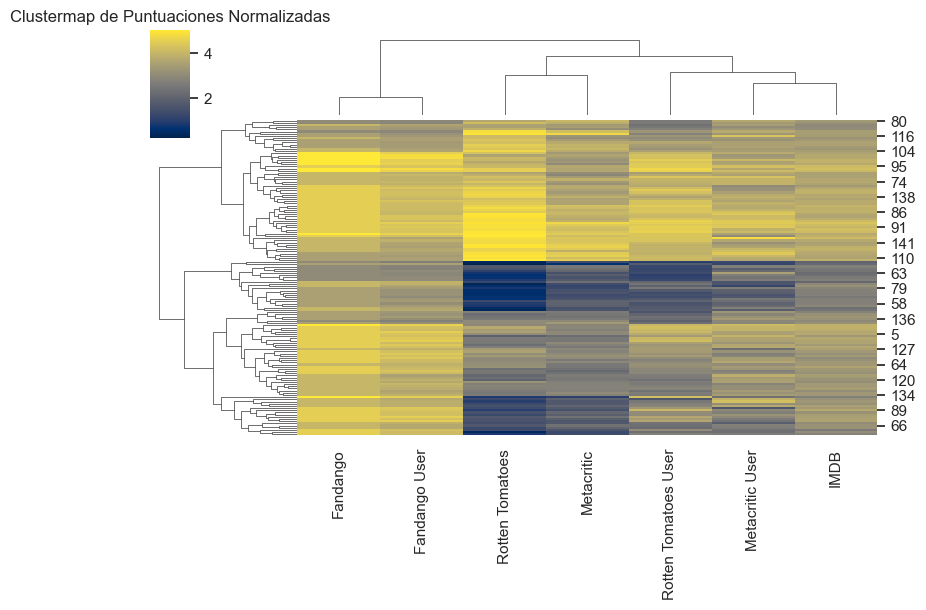

In [53]:
# 6. clustermap
# Las películas de alta calificación
# deben agruparse en comparación con las películas de baja calificación.


# Crear una visualización de tipo clustermap de todas las puntuaciones normalizadas
plt.figure(figsize=(14, 10))
sns.clustermap(scores, method='average', cmap='cividis', figsize=(8, 6))
plt.title('Clustermap de Puntuaciones Normalizadas')
plt.show()



In [54]:
# 7. Examinemos las 10 peores películas.
# Ordenar el DataFrame por las calificaciones de críticos de Rotten Tomatoes de forma ascendente
lowest_rtc_scores = merged_df.sort_values(by='RottenTomatoes_Normalized', ascending=True)

lowest_rtc_scores[['FILM', 'RottenTomatoes_Normalized']].head(10)


,FILM,RottenTomatoes_Normalized
49,Paul Blart: Mall Cop 2 (2015),0.25
84,Hitman: Agent 47 (2015),0.35
54,Hot Pursuit (2015),0.40
25,Taken 3 (2015),0.45
28,Fantastic Four (2015),0.45
50,The Boy Next Door (2015),0.50
88,The Loft (2015),0.55
87,Unfinished Business (2015),0.55
78,Mortdecai (2015),0.60
77,Seventh Son (2015),0.60


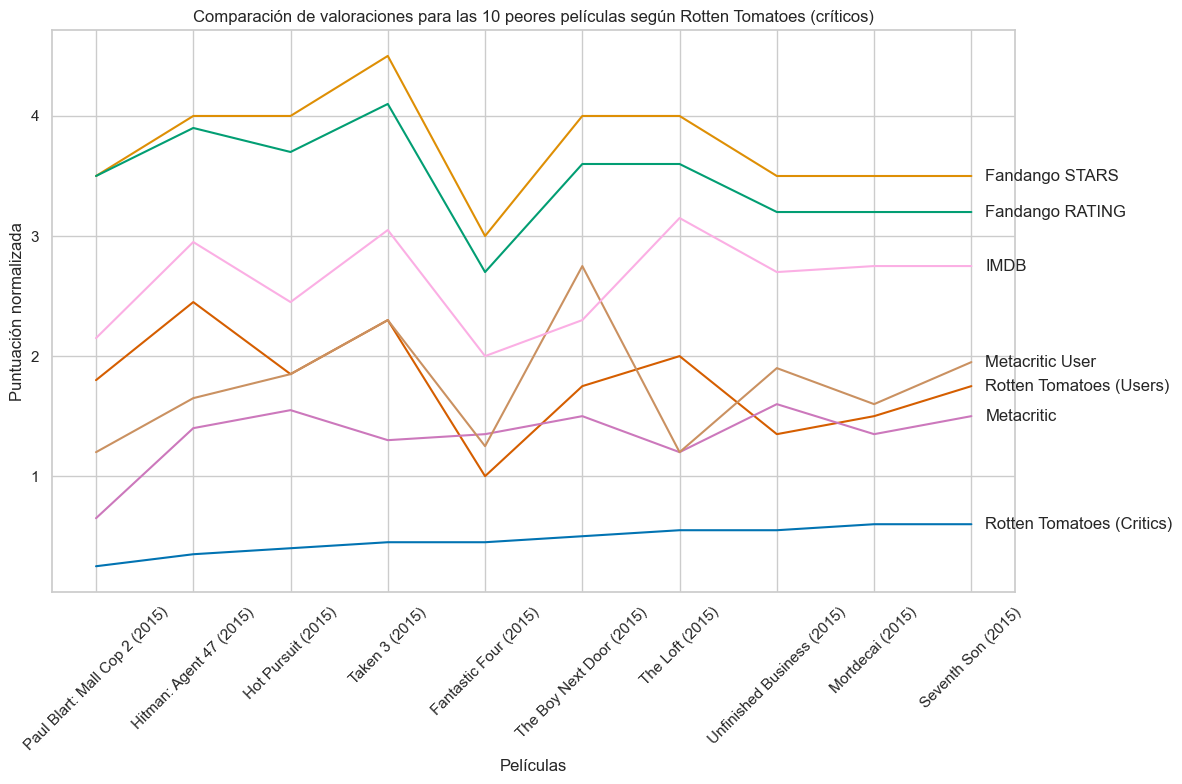

In [56]:
# Seleccionar las columnas relevantes para la visualización
comparison_data_specific = lowest_rtc_scores[['FILM', 'RottenTomatoes_Normalized','STARS', 'RATING', 'RottenTomatoes_User_Normalized', 'Metacritic_Normalized', 'Metacritic_User_Normalized1', 'IMDB_Normalized']].head(10)

# Renombrar las columnas para una mejor visualización
comparison_data_specific.columns = ['FILM', 'Rotten Tomatoes (Critics)', 'Fandango STARS', 'Fandango RATING', 'Rotten Tomatoes (Users)', 'Metacritic', 'Metacritic User', 'IMDB']

# Configurar el tamaño de la visualización
plt.figure(figsize=(12, 8))

lines = plt.plot(comparison_data_specific['FILM'], comparison_data_specific.drop('FILM', axis=1))

# Configurar la leyenda y los títulos
plt.title('Comparación de valoraciones para las 10 peores películas según Rotten Tomatoes (críticos)')
plt.xlabel('Películas')
plt.ylabel('Puntuación normalizada')
plt.xticks(rotation=45)

# Añadir etiquetas sobre cada línea
for i, line in enumerate(lines):
    y_value = line.get_ydata()[-1]  # Último valor de la línea
    plt.annotate(comparison_data_specific.columns[i + 1], xy=(len(comparison_data_specific) - 1, y_value), fontsize=12, ha='left', va='center', xytext=(10, 0), textcoords='offset points')


# Mostrar la gráfica
plt.tight_layout()
plt.show()

<font color='green'>Fin actividad 6</font>